# VARIMA Time Series Modeling Example

This notebook demonstrates how to use the `VARIMA` class from the Econometron package to fit and forecast a multivariate macroeconomic time series using the data in `Z.mat`.

In [1]:
from econometron.Models.varima import VARIMA
import pandas as pd
import scipy.io as sio

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Load and Prepare Data
Load the macroeconomic data from `Z.mat` and organize it as a DataFrame with a quarterly date index.

In [2]:
mat = sio.loadmat('../Z.mat')
y = mat['Z']
data = pd.DataFrame(y.T)
dates = pd.date_range(start='2000-01-01', periods=data.shape[0], freq='Q')
data.index = dates
data.head()

,0,1,2
2000-03-31,0.026524,0.015403,0.043721
2000-06-30,0.016615,0.012219,0.021177
2000-09-30,0.018282,0.007285,-0.005417
2000-12-31,0.019048,0.005601,-0.010110
2001-03-31,0.010364,0.002916,-0.024202


## 2. Fit the VARIMA Model
Fit a VARIMA model to the first three columns of the data, using automatic order selection (AIC criterion).

Processing time series for stationarity...

Processing column: 0
0 is not stationary (p-value: 0.1926)
0 becomes stationary after 1 differencing (p-value: 0.0000)


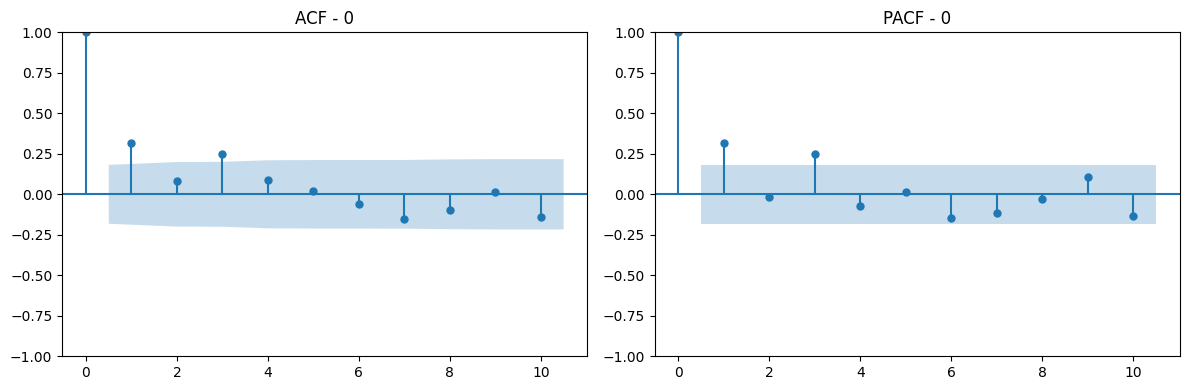


Processing column: 1
1 is stationary (p-value: 0.0328)


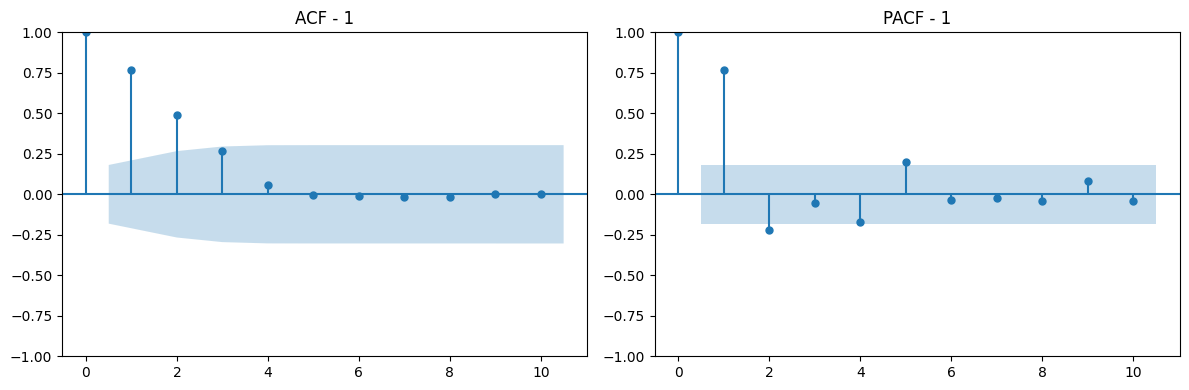


Processing column: 2
2 is stationary (p-value: 0.0018)


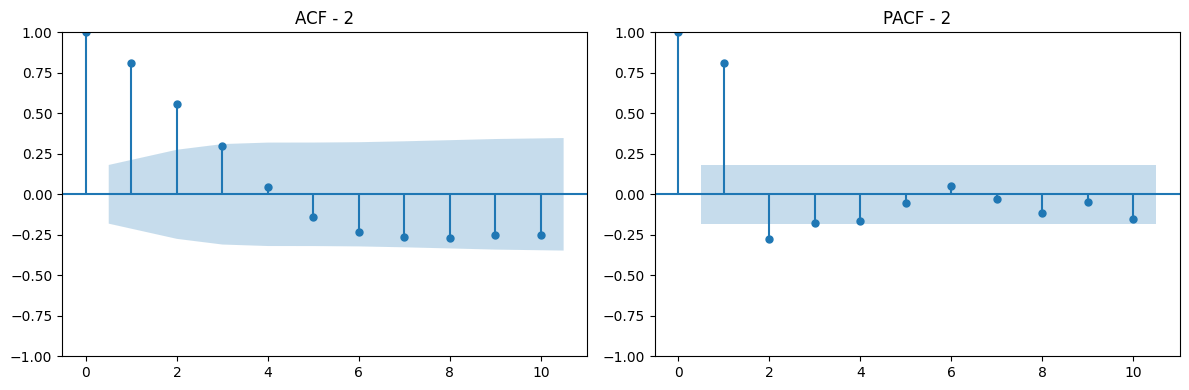

Fitting VARIMA model with 116 observations and 3 variables...
Trying VARIMA(0, d, 1)...


C:\Users\ASUS\econometron\econometron\Models\varima.py:315: RuntimeWarning: divide by zero encountered in log
  log_det = np.log(np.linalg.det(resid_cov))
C:\Users\ASUS\econometron\econometron\Models\varima.py:315: RuntimeWarning: invalid value encountered in log
  log_det = np.log(np.linalg.det(resid_cov))
C:\Users\ASUS\econometron\econometron\Models\varima.py:315: RuntimeWarning: invalid value encountered in log
  log_det = np.log(np.linalg.det(resid_cov))


  AIC: -929.5529
Trying VARIMA(0, d, 2)...
  AIC: -903.7150
Trying VARIMA(1, d, 0)...
  AIC: -903.7150
Trying VARIMA(1, d, 0)...
  AIC: -929.9993
Trying VARIMA(1, d, 1)...
  AIC: -929.9993
Trying VARIMA(1, d, 1)...
  AIC: -912.1045
Trying VARIMA(1, d, 2)...
  AIC: -912.1045
Trying VARIMA(1, d, 2)...
  AIC: -885.8338
Trying VARIMA(2, d, 0)...
  AIC: -885.8338
Trying VARIMA(2, d, 0)...
  AIC: -903.7829
Trying VARIMA(2, d, 1)...
  AIC: -903.7829
Trying VARIMA(2, d, 1)...
  AIC: -885.8734
Trying VARIMA(2, d, 2)...
  AIC: -885.8734
Trying VARIMA(2, d, 2)...
  Optimization failed: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  Optimization failed: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT


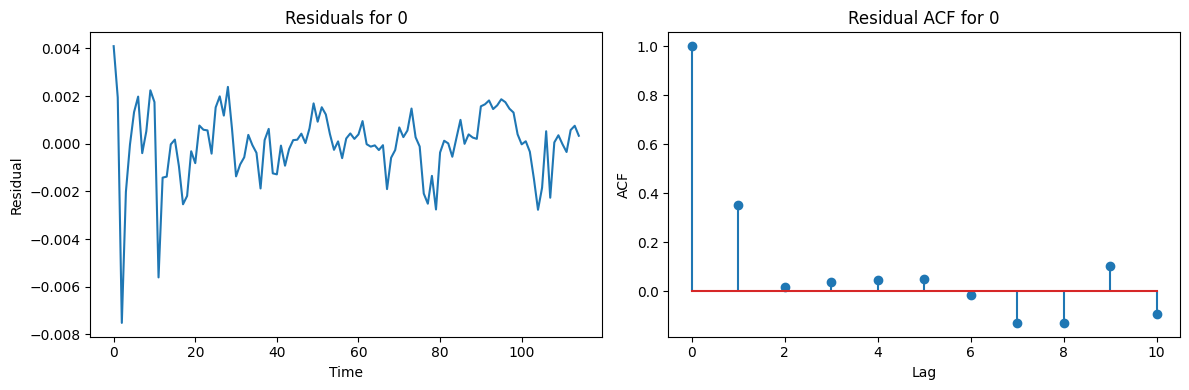

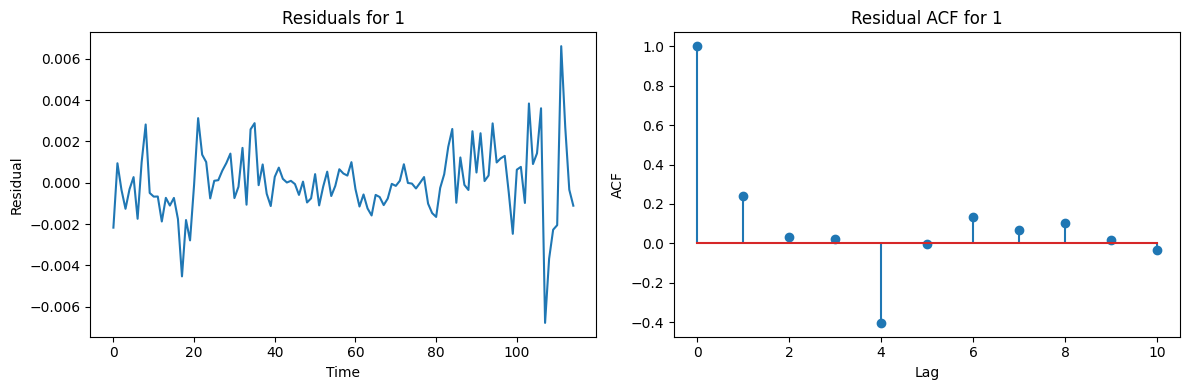

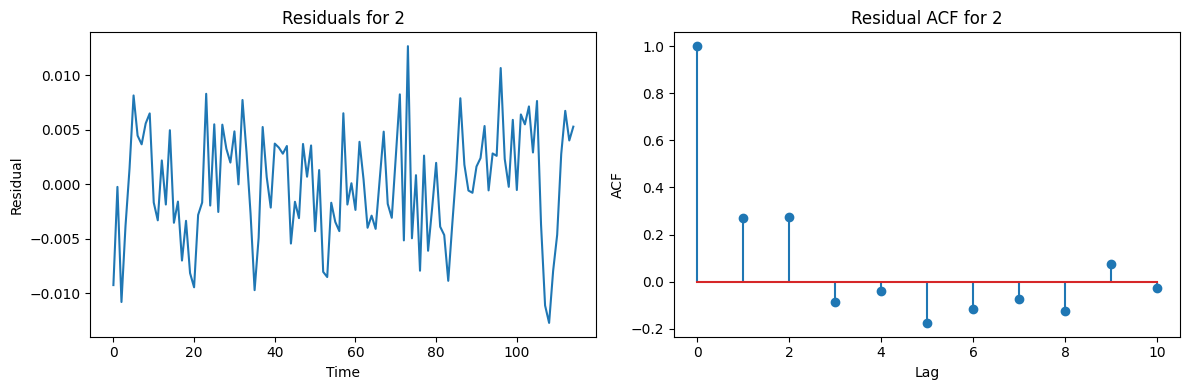

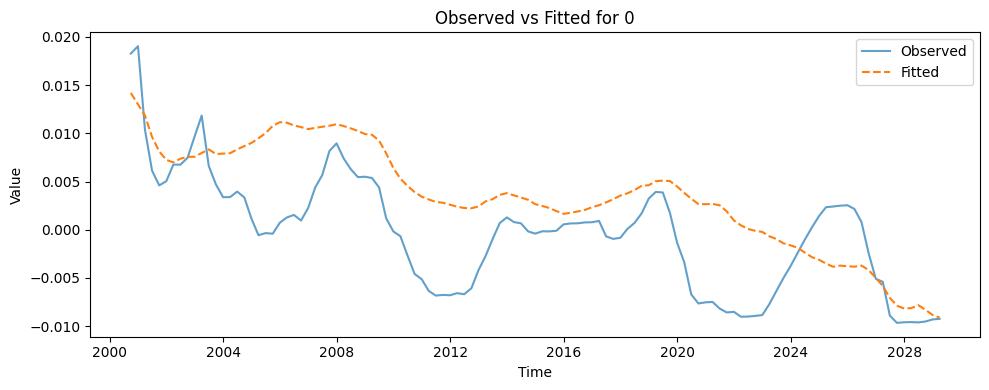

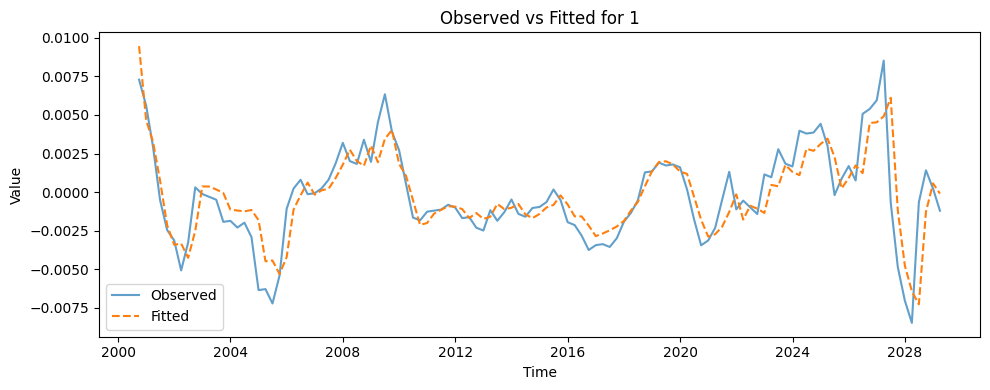

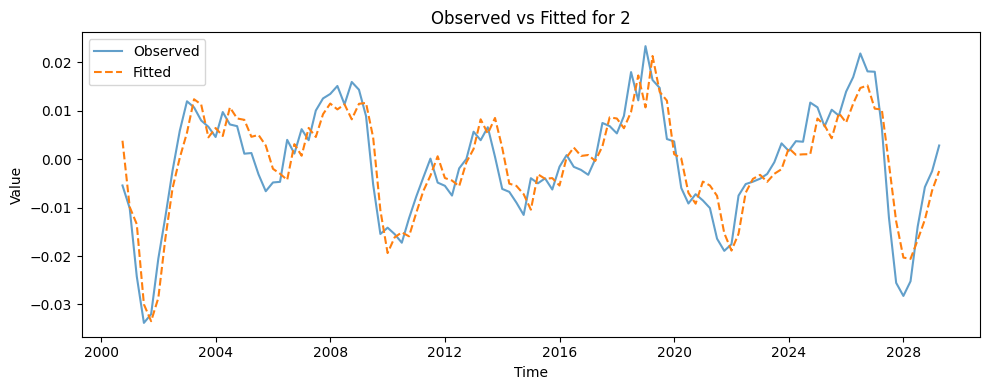


Best VARIMA Model:
AR Lags: 1, MA Lags: 0
AIC: -929.9993
0 differencing order: 1
1 differencing order: 0
2 differencing order: 0

Coefficient Table:
            0_coef    0_se     0_z     0_p  1_coef     1_se     1_z     1_p  \
Constant   -0.0002  0.7613 -0.0003  1.9996 -0.0001   0.2176 -0.0006  1.9990   
AR_Lag_1_0  0.1104  4.6904  0.0235  1.9624 -0.0048   2.3882 -0.0020  1.9968   
AR_Lag_1_1 -0.1401  2.7965 -0.0501  1.9201  0.6951  24.0171  0.0289  1.9538   
AR_Lag_1_2  0.0270  4.4760  0.0060  1.9904  0.0494  20.9053  0.0024  1.9962   

            2_coef     2_se     2_z     2_p  
Constant   -0.0001   0.5031 -0.0002  1.9997  
AR_Lag_1_0  0.6014  27.2208  0.0221  1.9647  
AR_Lag_1_1 -0.7904  40.7333 -0.0194  1.9690  
AR_Lag_1_2  0.9233  28.2627  0.0327  1.9479  

Residual Diagnostics:
0:
  Mean = -0.0000, Variance = 0.0000
  Ljung-Box Test: Statistic = 22.0482, p-value = 0.0149
  Shapiro-Wilk Test: Statistic = 0.8908, p-value = 0.0000
1:
  Mean = 0.0000, Variance = 0.0000
  Ljung-Bo

In [3]:
varima_model = VARIMA(max_p=2, max_q=2, criterion='AIC', forecast_horizon=5, plot=True)
varima_model.fit(data, date_column='', columns=[0, 1, 2])

## 3. Forecast and Visualize
Forecast the next 5 periods and display the results.

In [4]:
forecast = varima_model.predict(h=5)
print("Forecasted values:")
print(forecast)

Forecasted values:
                   0         1         2  0_ci_lower  0_ci_upper  1_ci_lower  \
2029-06-30 -0.009193 -0.000830  0.003509   -0.029009    0.010624   -0.020702   
2029-09-30 -0.009169 -0.000538  0.003825   -0.052551    0.034214   -0.024169   
2029-12-31 -0.009181 -0.000318  0.003864   -0.078643    0.060281   -0.026471   
2030-03-31 -0.009227 -0.000164  0.003705   -0.106714    0.088260   -0.028267   
2030-06-30 -0.009303 -0.000064  0.003416   -0.136422    0.117817   -0.029779   

            1_ci_upper  2_ci_lower  2_ci_upper  
2029-06-30    0.019041   -0.018522    0.025540  
2029-09-30    0.023094   -0.022374    0.030024  
2029-12-31    0.025834   -0.025130    0.032858  
2030-03-31    0.027939   -0.027451    0.034861  
2030-06-30    0.029651   -0.029528    0.036359  


## 4. Summary
- Loaded macroeconomic data from `Z.mat`.
- Fitted a VARIMA model with automatic order selection.
- Forecasted future values and displayed the results.

You can adjust the `max_p`, `max_q`, and `columns` parameters for different model specifications or datasets.

## 5. Diagnostics and Visualization
You can visualize the model fit, residuals, and diagnostics using built-in plotting methods.

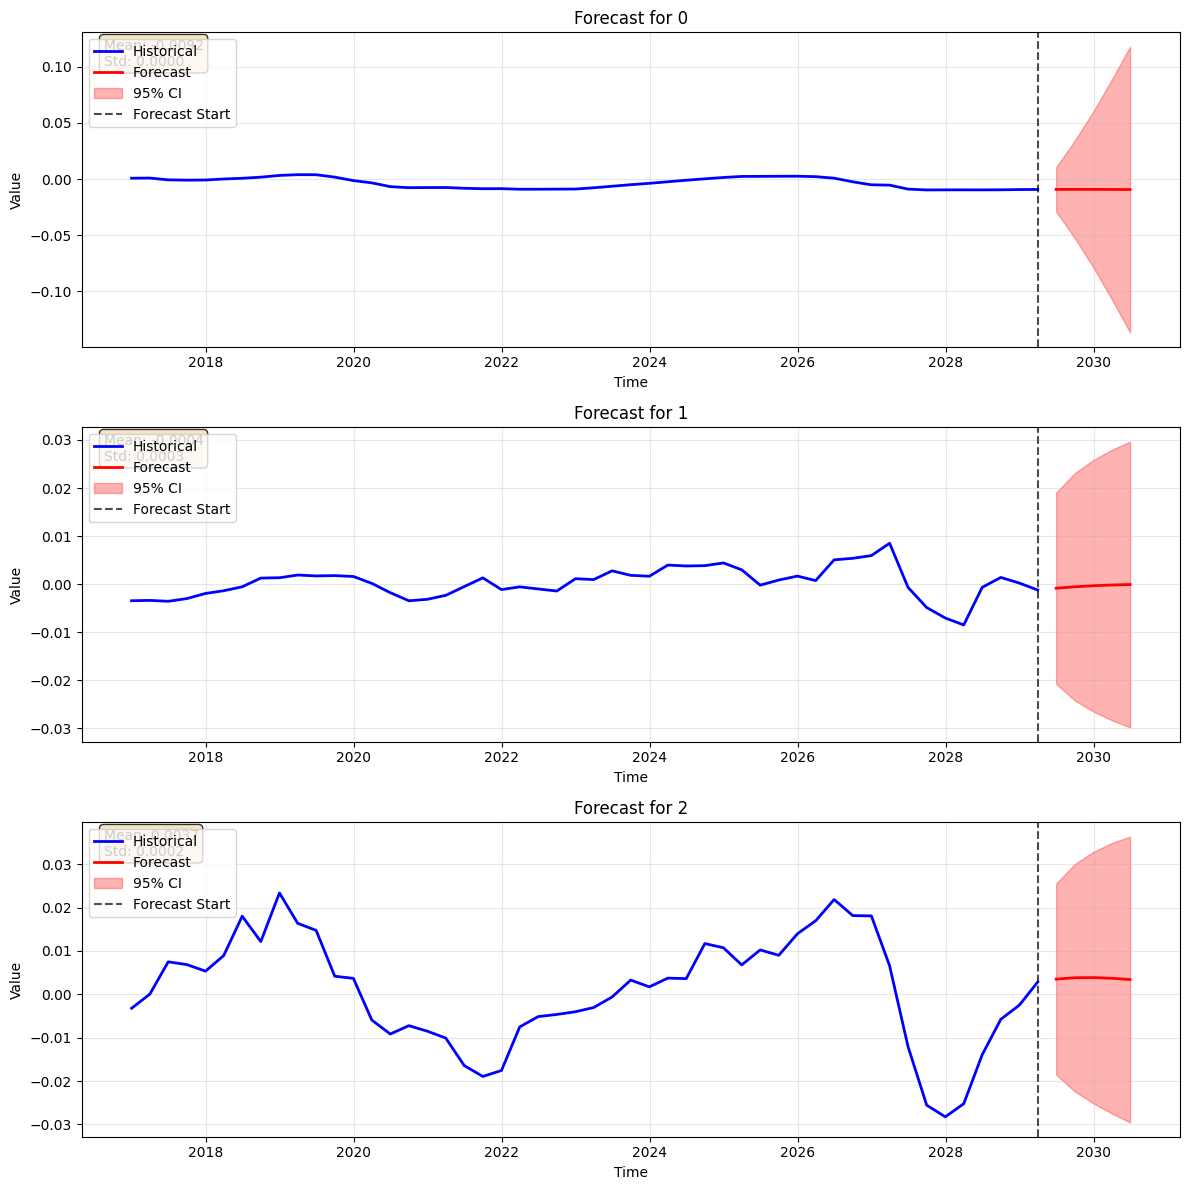


Forecast Summary:

0:
  Mean Forecast: -0.0092
  Forecast Range: [-0.0093, -0.0092]
  Average CI Width: 0.1429

1:
  Mean Forecast: -0.0004
  Forecast Range: [-0.0008, -0.0001]
  Average CI Width: 0.0510

2:
  Mean Forecast: 0.0037
  Forecast Range: [0.0034, 0.0039]
  Average CI Width: 0.0565


In [5]:
# Plot the forecast
varima_model.plot_forecast(h=5, include_history=True, history_periods=50)

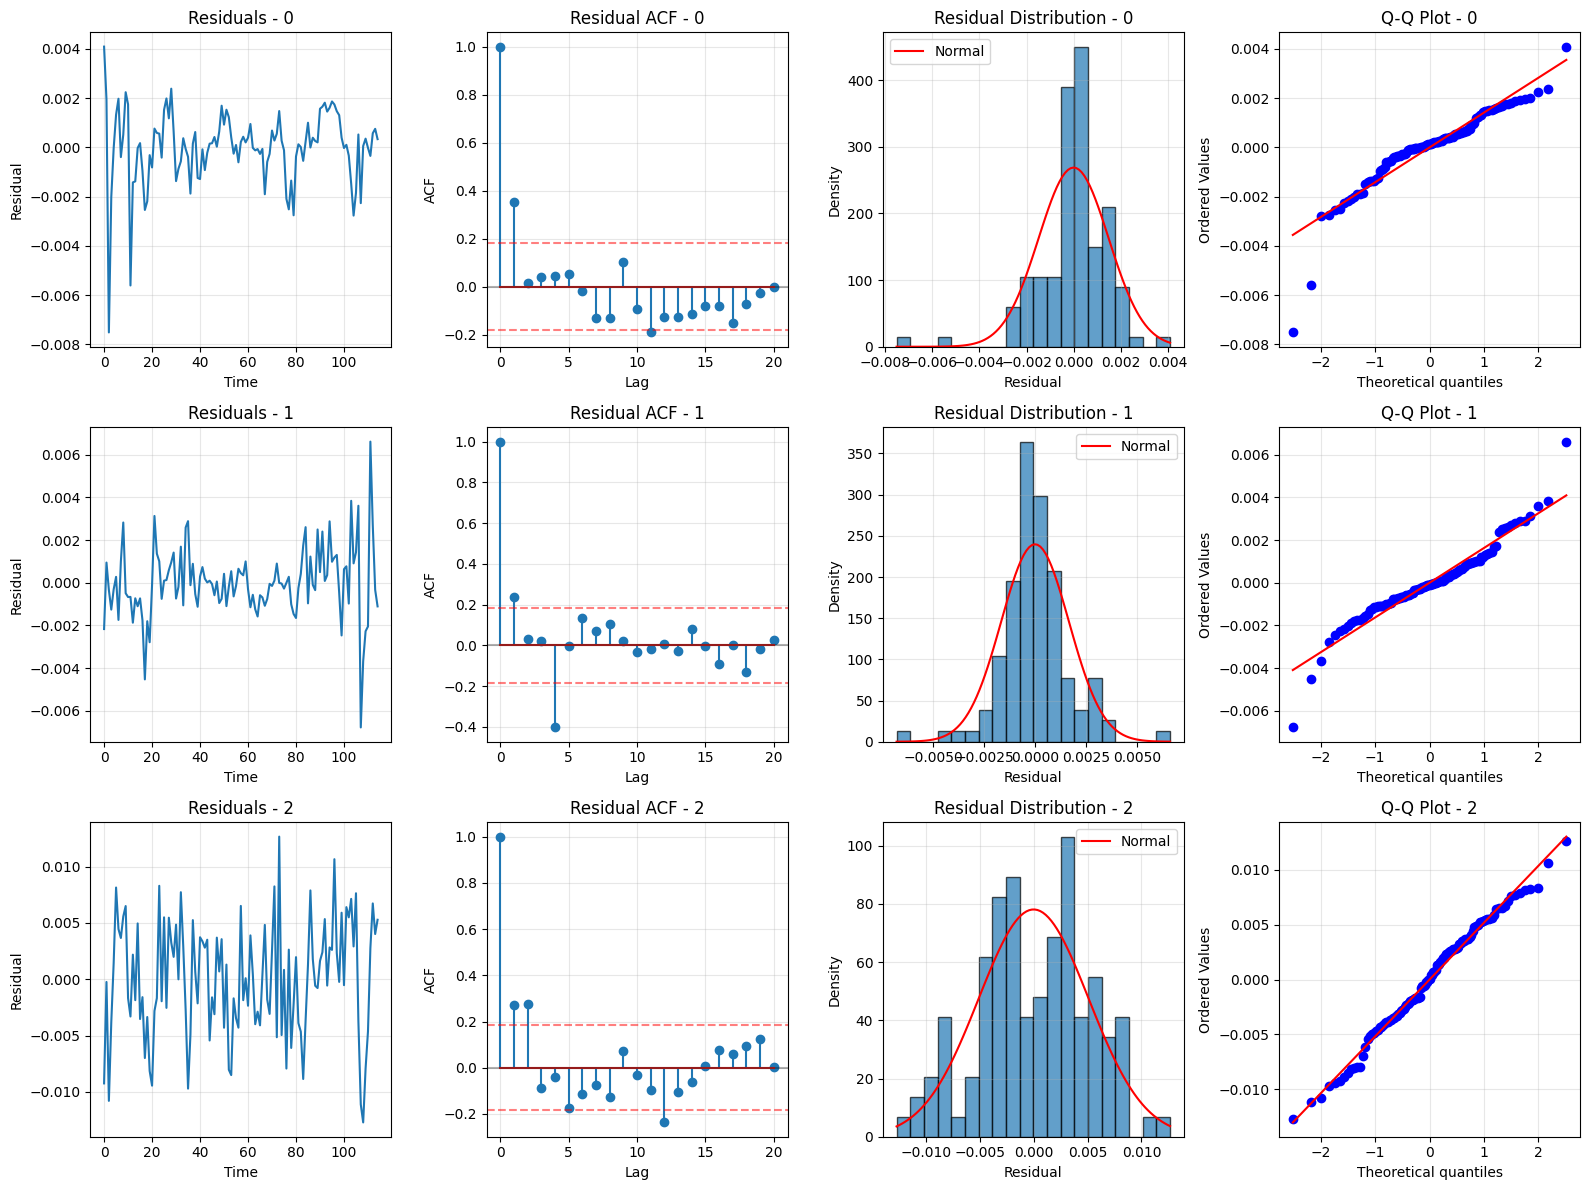


Residual Diagnostics Summary:

0:
  Mean: -0.000001
  Std Dev: 0.001484
  Skewness: -1.5130
  Kurtosis: 6.0105
  Ljung-Box Test: Statistic = 22.0482, p-value = 0.0149
  Shapiro-Wilk Test: Statistic = 0.8908, p-value = 0.0000
  ✗ Significant autocorrelation detected
  ✗ Residuals may not be normally distributed

1:
  Mean: 0.000001
  Std Dev: 0.001664
  Skewness: 0.0617
  Kurtosis: 3.6006
  Ljung-Box Test: Statistic = 30.9148, p-value = 0.0006
  Shapiro-Wilk Test: Statistic = 0.9386, p-value = 0.0000
  ✗ Significant autocorrelation detected
  ✗ Residuals may not be normally distributed

2:
  Mean: 0.000000
  Std Dev: 0.005110
  Skewness: -0.1700
  Kurtosis: -0.4252
  Ljung-Box Test: Statistic = 27.5078, p-value = 0.0022
  Shapiro-Wilk Test: Statistic = 0.9892, p-value = 0.4955
  ✗ Significant autocorrelation detected
  ✓ Residuals appear normally distributed


In [6]:
# Plot residuals
varima_model.plot_residuals()

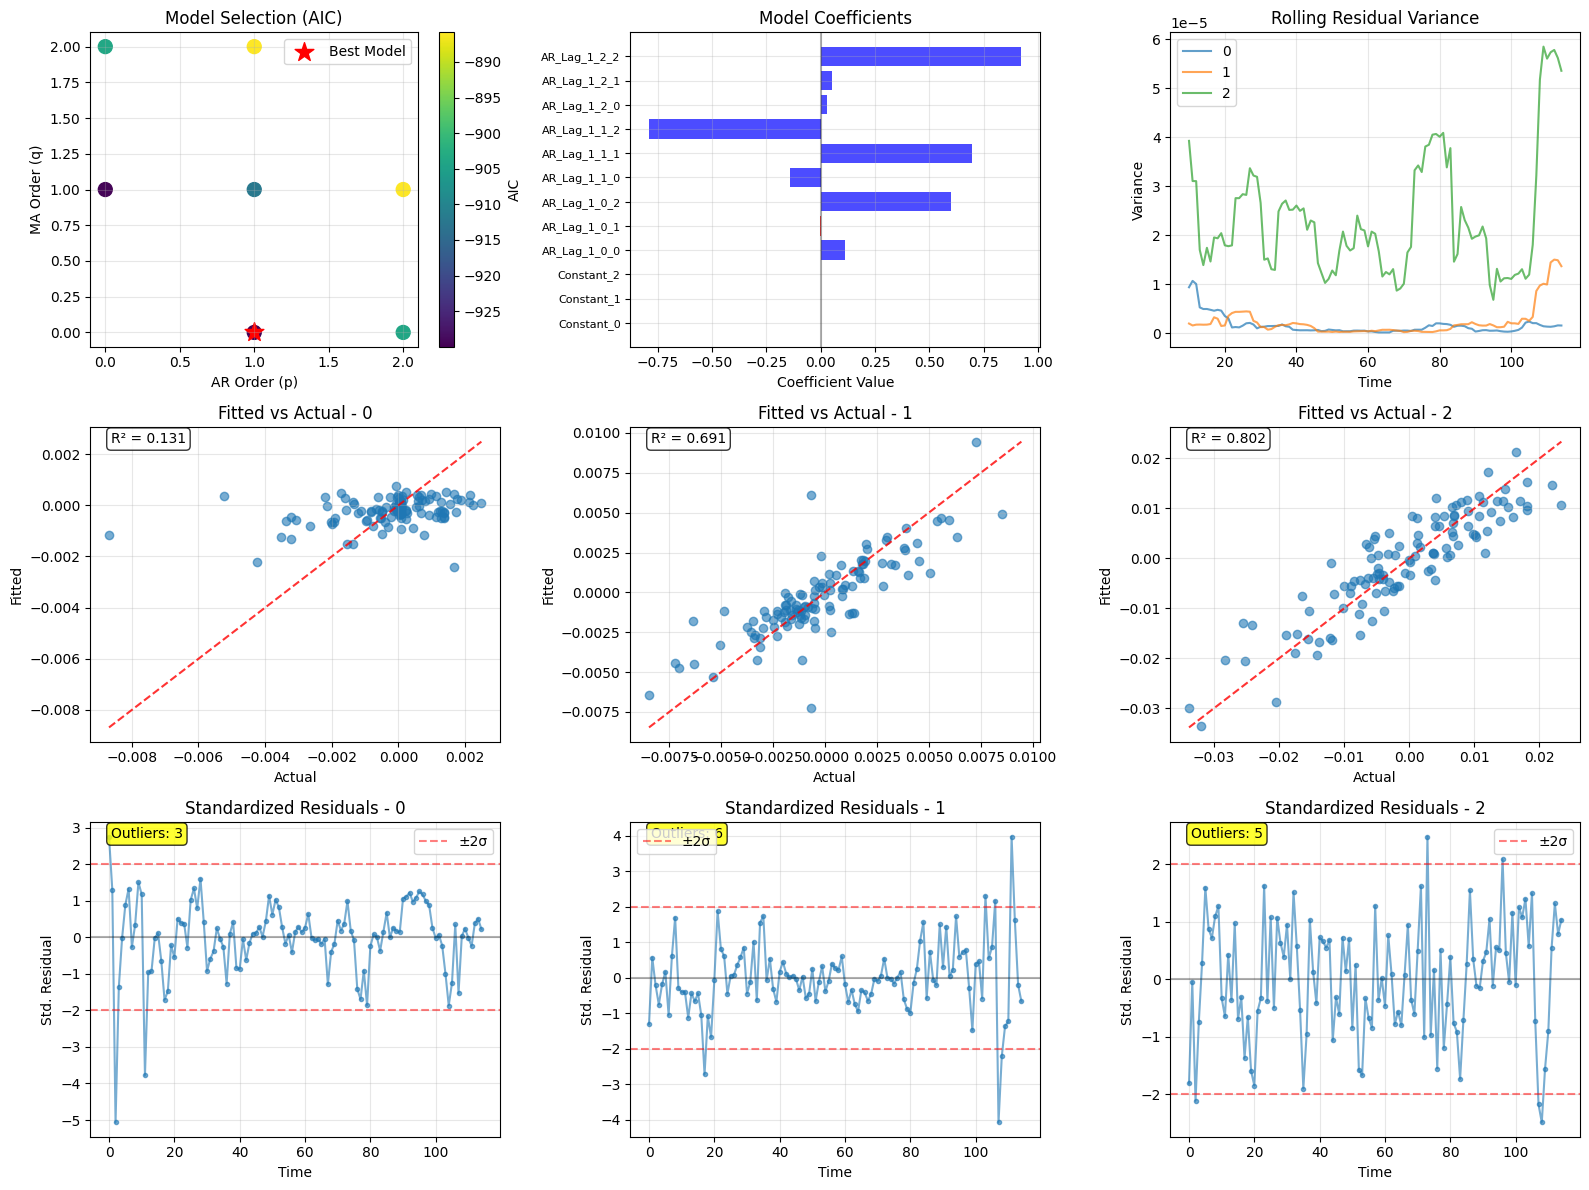


Comprehensive Model Diagnostics:
Best Model: VARIMA(1, d, 0)
Model Selection Criterion (AIC): -929.9993
Number of Parameters: 12
Sample Size: 116

Model Fit Statistics:
  0:
    R-squared: 0.1314
    RMSE: 0.0015
    MAE: 0.0010
    MAPE: 264.80%
  1:
    R-squared: 0.6907
    RMSE: 0.0017
    MAE: 0.0012
    MAPE: 113.24%
  2:
    R-squared: 0.8023
    RMSE: 0.0051
    MAE: 0.0042
    MAPE: 128.25%

Residual Diagnostics Summary:
  Ljung-Box Test (No Autocorrelation): ✗ FAIL
  Shapiro-Wilk Test (Normality): ✗ FAIL

Model Stability:
  Maximum coefficient magnitude: 0.9233
  ✓ Model appears stable (all coefficients < 1)


In [7]:
# Plot diagnostics (e.g., ACF, PACF, QQ-plot)
varima_model.plot_diagnostics()